In [1]:
#from gng import GrowingNeuralGas
from gwr import GrowingWhenRequired



In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import os
import shutil


In [3]:
    if os.path.exists('visualization/sequence'):
        shutil.rmtree('visualization/sequence')
    os.makedirs('visualization/sequence')
    n_samples = 2000
    dataset_type = 'moons'
    data = None
    print('Preparing data...')


Preparing data...


In [4]:
    if dataset_type == 'blobs':
        data = datasets.make_blobs(n_samples=n_samples, random_state=8)
    elif dataset_type == 'moons':
        data = datasets.make_moons(n_samples=n_samples, noise=.05)
    elif dataset_type == 'circles':
        data = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
    data = StandardScaler().fit_transform(data[0])
    print('Done.')


Done.


In [5]:
print('Fitting neural network...')
#gng = GrowingNeuralGas(data)
elems = data.shape[1]
print('elems=',elems)
hparams = GrowingWhenRequired.default_hparams()
hparams['input_shape'] = [elems]
hparams['max_size'] = 500
hparams['min_size'] = 500
hparams['max_age'] = 20
hparams['growth_interval'] = 1
hparams['growth_strategy'] = 'required'
hparams['activity_threshold'] = 1.1  #0.5 # maybe I can dynamically adjust activity threshold need to plot multiple series over time.
hparams['usage_threshold'] = 0.1
hparams['usage_decay'] = 0.95  # 0.8 default

gng = GrowingWhenRequired(hparams)


Fitting neural network...
elems= 2


   Pass #1


/home/dave/anaconda3/envs/dave19d/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


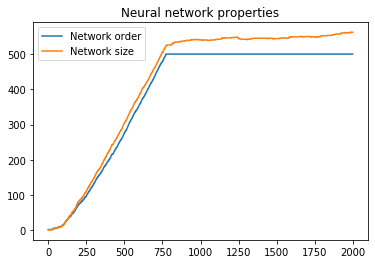

In [6]:
gng.fit_network(data, passes=1, plot_interval=1)


Found 1 clusters.


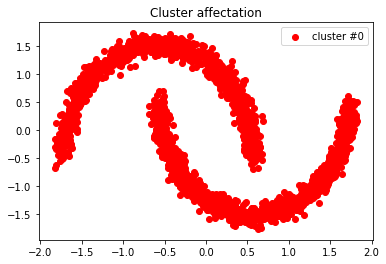

In [7]:
print('Found %d clusters.' % gng.number_of_clusters())
gng.plot_clusters(gng.cluster_data(data))
